# Proyek AI - Tugas Akhir

- Nama    : Isna Nur Amalia
- NIM     : A11.2022.14330
- Kelas   : A11.43UG1
- GitHub  : https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention


### Tujuan
- Menemukan faktor-faktor yang mempengaruhi siswa untuk dikeluarkan atau dimutasi
- Memberikan treatment atau pencegahan agar hal yang sama tidak terjadi lagi
- Meningkatkan kualitas lulusan SMK Askhabul Kahfi


## Library

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [8]:
# load dataset
dataAwal = pd.read_csv("../Dataset/dataset.csv")
dataAwal.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
from collections import Counter
print('The original shape:', Counter(dataAwal['Target']))

The original shape: Counter({'Graduate': 2209, 'Dropout': 1421, 'Enrolled': 794})


In [10]:
dataAwal.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [11]:
dataAwal.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

### Assessing Data

#### Menilai tabel `dataset`

In [12]:
dataAwal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [13]:
dataAwal.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [14]:
print("Jumlah duplikasi: ", dataAwal.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
dataAwal.describe() # utk melihat statistik deskriptif

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [16]:
student_data = dataAwal.copy()

# Change the Target to Numerical Value 0 or 1. We are predicting if a Student is gonna Dropout or Graduate, ignoring the ones who are Enrolled.
student_data.replace("Dropout", 1, inplace=True)
student_data.replace("Graduate", 0, inplace=True)
student_data.drop(student_data[student_data["Target"]=="Enrolled"].index, inplace=True)
student_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


## Exploratory Data Analysis (EDA)

### Buat Model utk `dataset`

In [17]:
dataAwal.sample(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1936,1,8,1,8,1,1,1,4,1,3,...,0,6,9,4,12.800000,0,13.9,-0.3,0.79,Graduate
2259,2,12,1,3,0,12,1,22,27,10,...,0,6,6,6,13.166667,0,12.7,3.7,-1.70,Graduate
4256,1,12,1,12,1,1,1,1,14,5,...,0,8,8,7,12.412857,0,10.8,1.4,1.74,Graduate
3715,1,1,2,9,1,1,1,22,1,6,...,0,5,10,2,12.500000,0,7.6,2.6,0.32,Enrolled
2773,1,13,3,12,1,1,1,1,1,5,...,0,8,8,8,14.252500,0,9.4,-0.8,-3.12,Graduate


In [27]:
# splitting the data
from sklearn.model_selection import train_test_split

# define input and target variable
x = dataAwal[['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 
            'Previous qualification', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 
            'Mother\'s occupation', 'Father\'s occupation', 'Displaced', 'Educational special needs', 
            'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
]
y = dataAwal["Target"]

# splitting test and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [19]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier(max_depth = 4, criterion = "entropy") # define model
dt_clf = dt_clf.fit(x_train, y_train) # training model

y_pred = dt_clf.predict(x_test) # predict model/ testing model

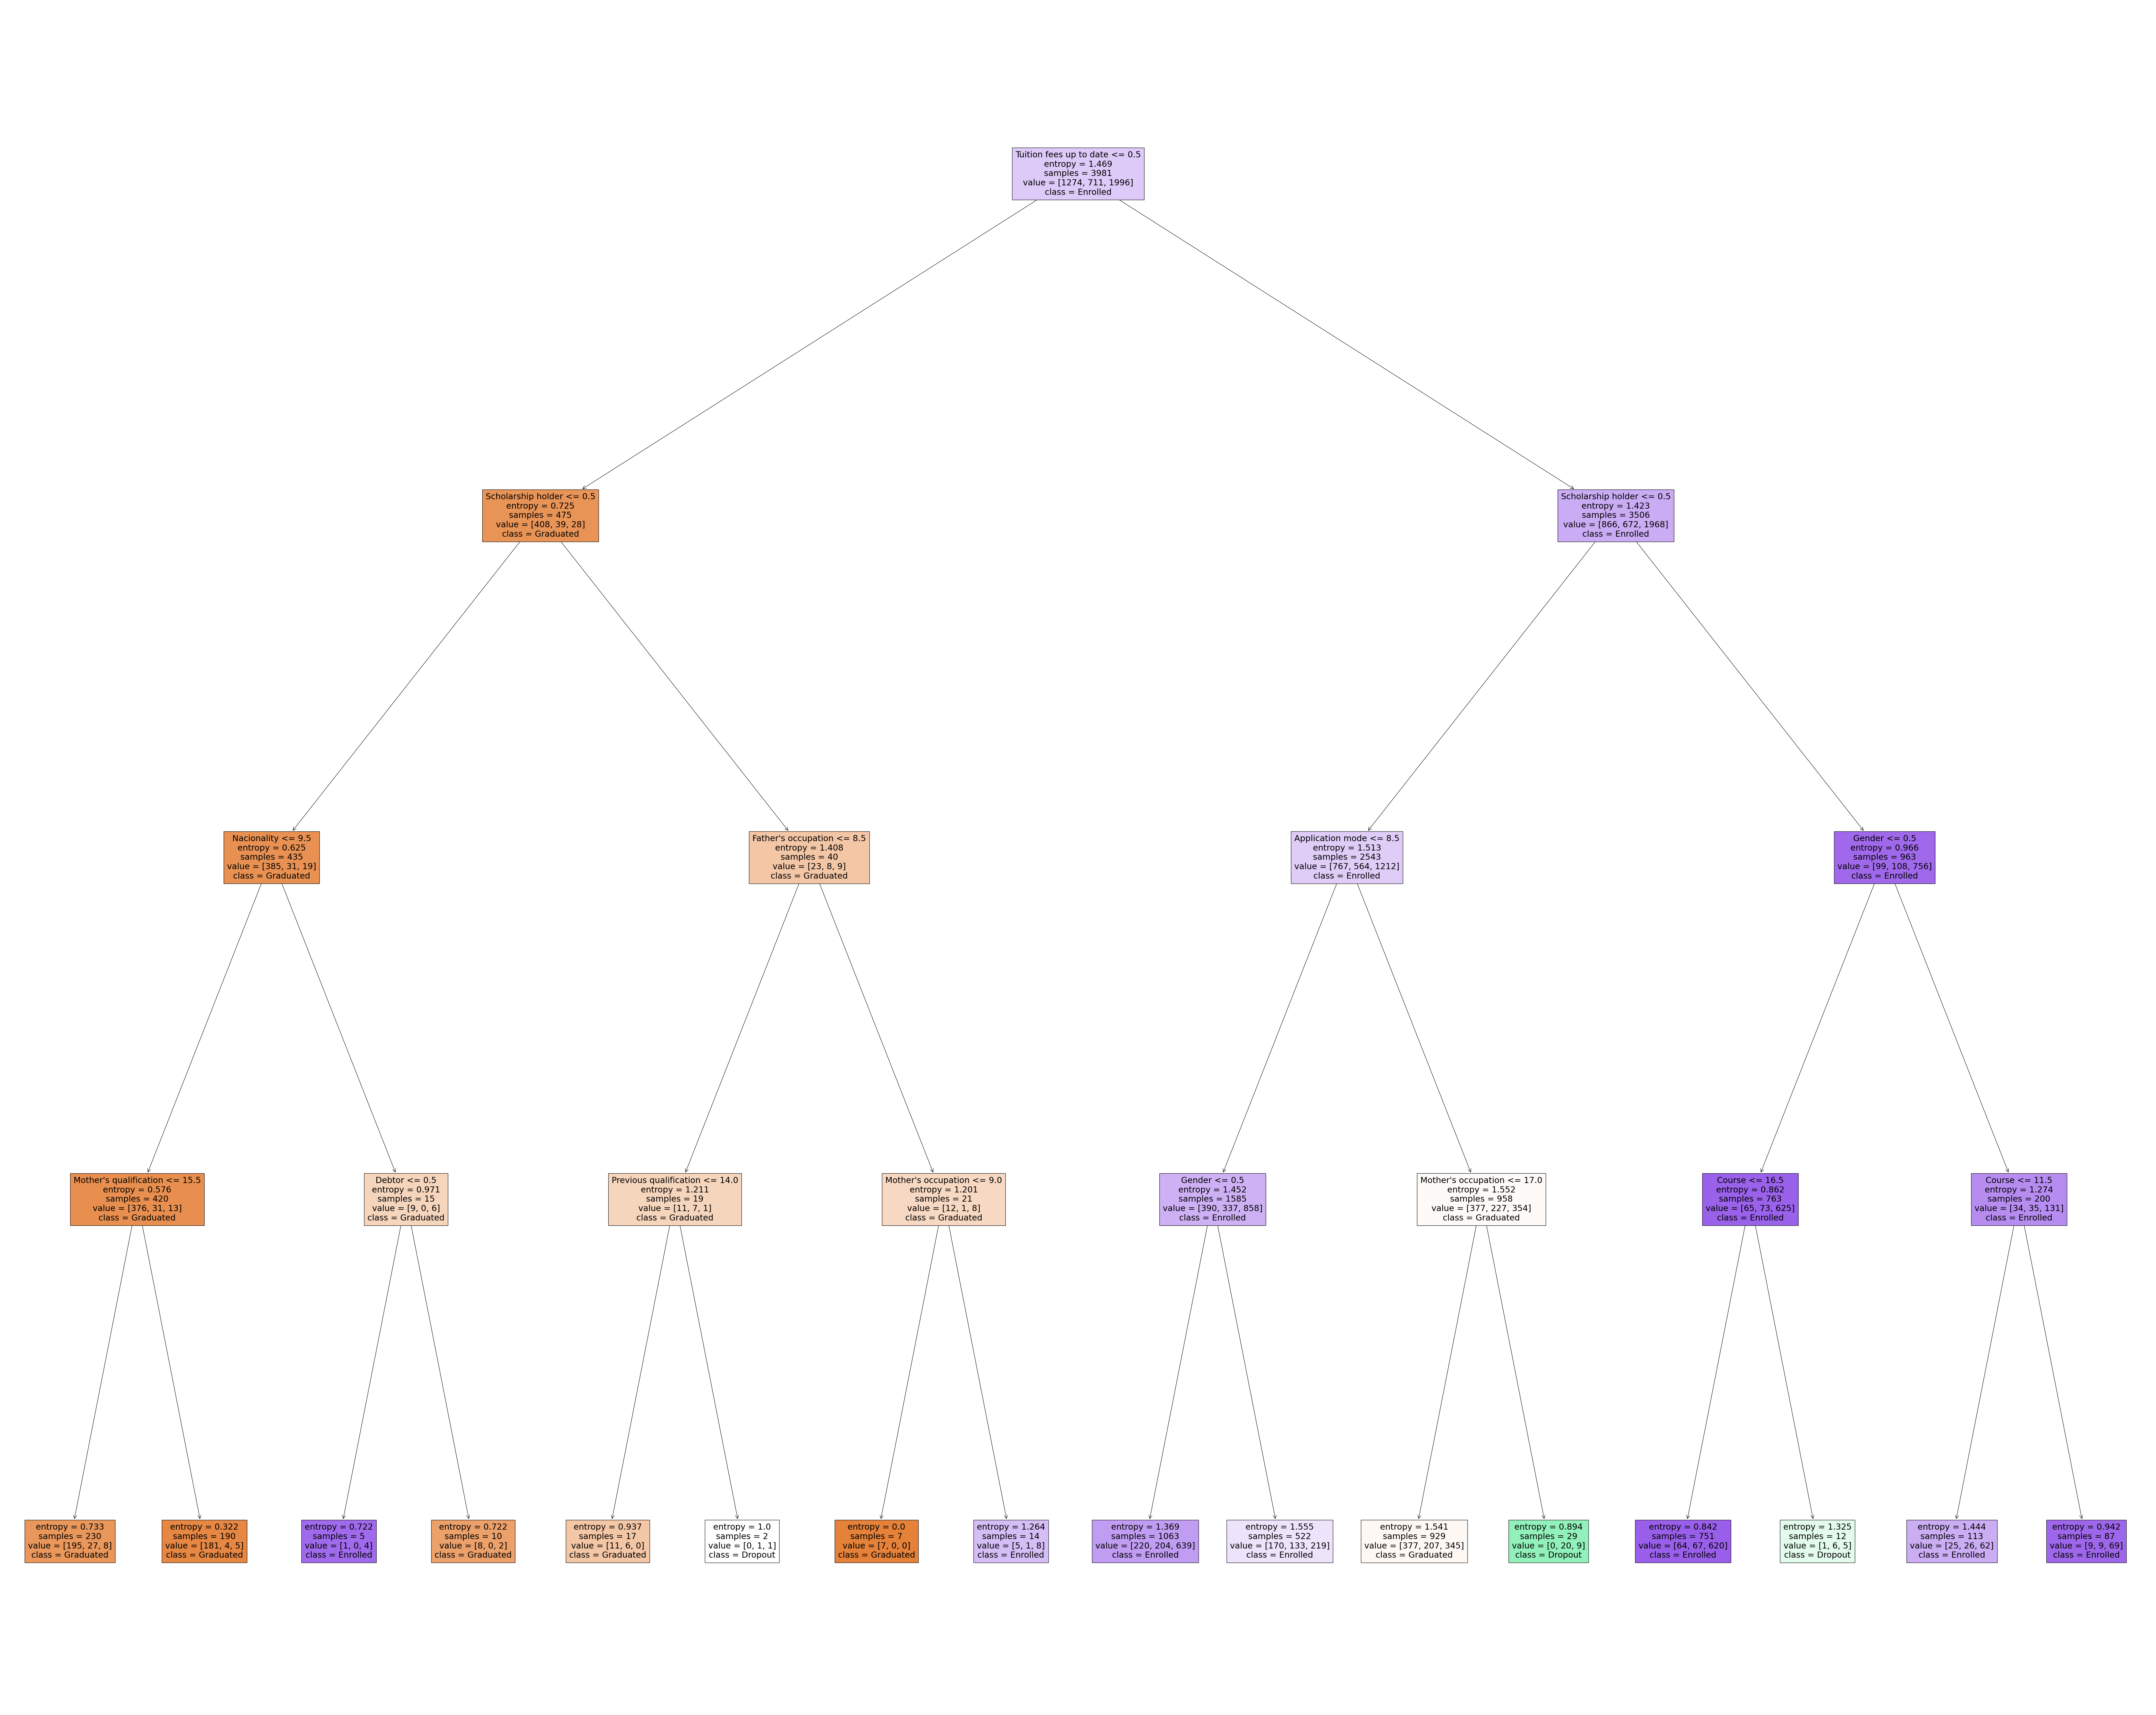

In [20]:
# plotting the decision tree
feature_names = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 
            'Previous qualification', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 
            'Mother\'s occupation', 'Father\'s occupation', 'Displaced', 'Educational special needs', 
            'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

class_names = ["Graduated", "Dropout", "Enrolled"]

fig = plt.figure(figsize=(100,80))
plot = tree.plot_tree(dt_clf,
                      feature_names = feature_names,
                      class_names = class_names,
                      filled = True)
plt.show()

In [21]:
y_test.shape # melihat jumlah data test

(443,)

In [22]:
y_train.shape # melihat jumlah data prediksi

(3981,)

In [23]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

f1_weighted = f1_score(y_test, y_pred, average='weighted')  # Menghitung F1 Score
accuracy = accuracy_score(y_test, y_pred)  # Menghitung Akurasi
precision = precision_score(y_test, y_pred, average='weighted')  # Menghitung Presisi
recall = recall_score(y_test, y_pred, average='weighted')  # Menghitung Recall

print(f"F1 Weighted = {f1_weighted:.2f}")
print(f"Accuracy = {accuracy:.2f}")
print(f"Precision = {precision:.2f}")
print(f"Recall = {recall:.2f}")

F1 Weighted = 0.53
Accuracy = 0.58
Precision = 0.61
Recall = 0.58


## Visualization

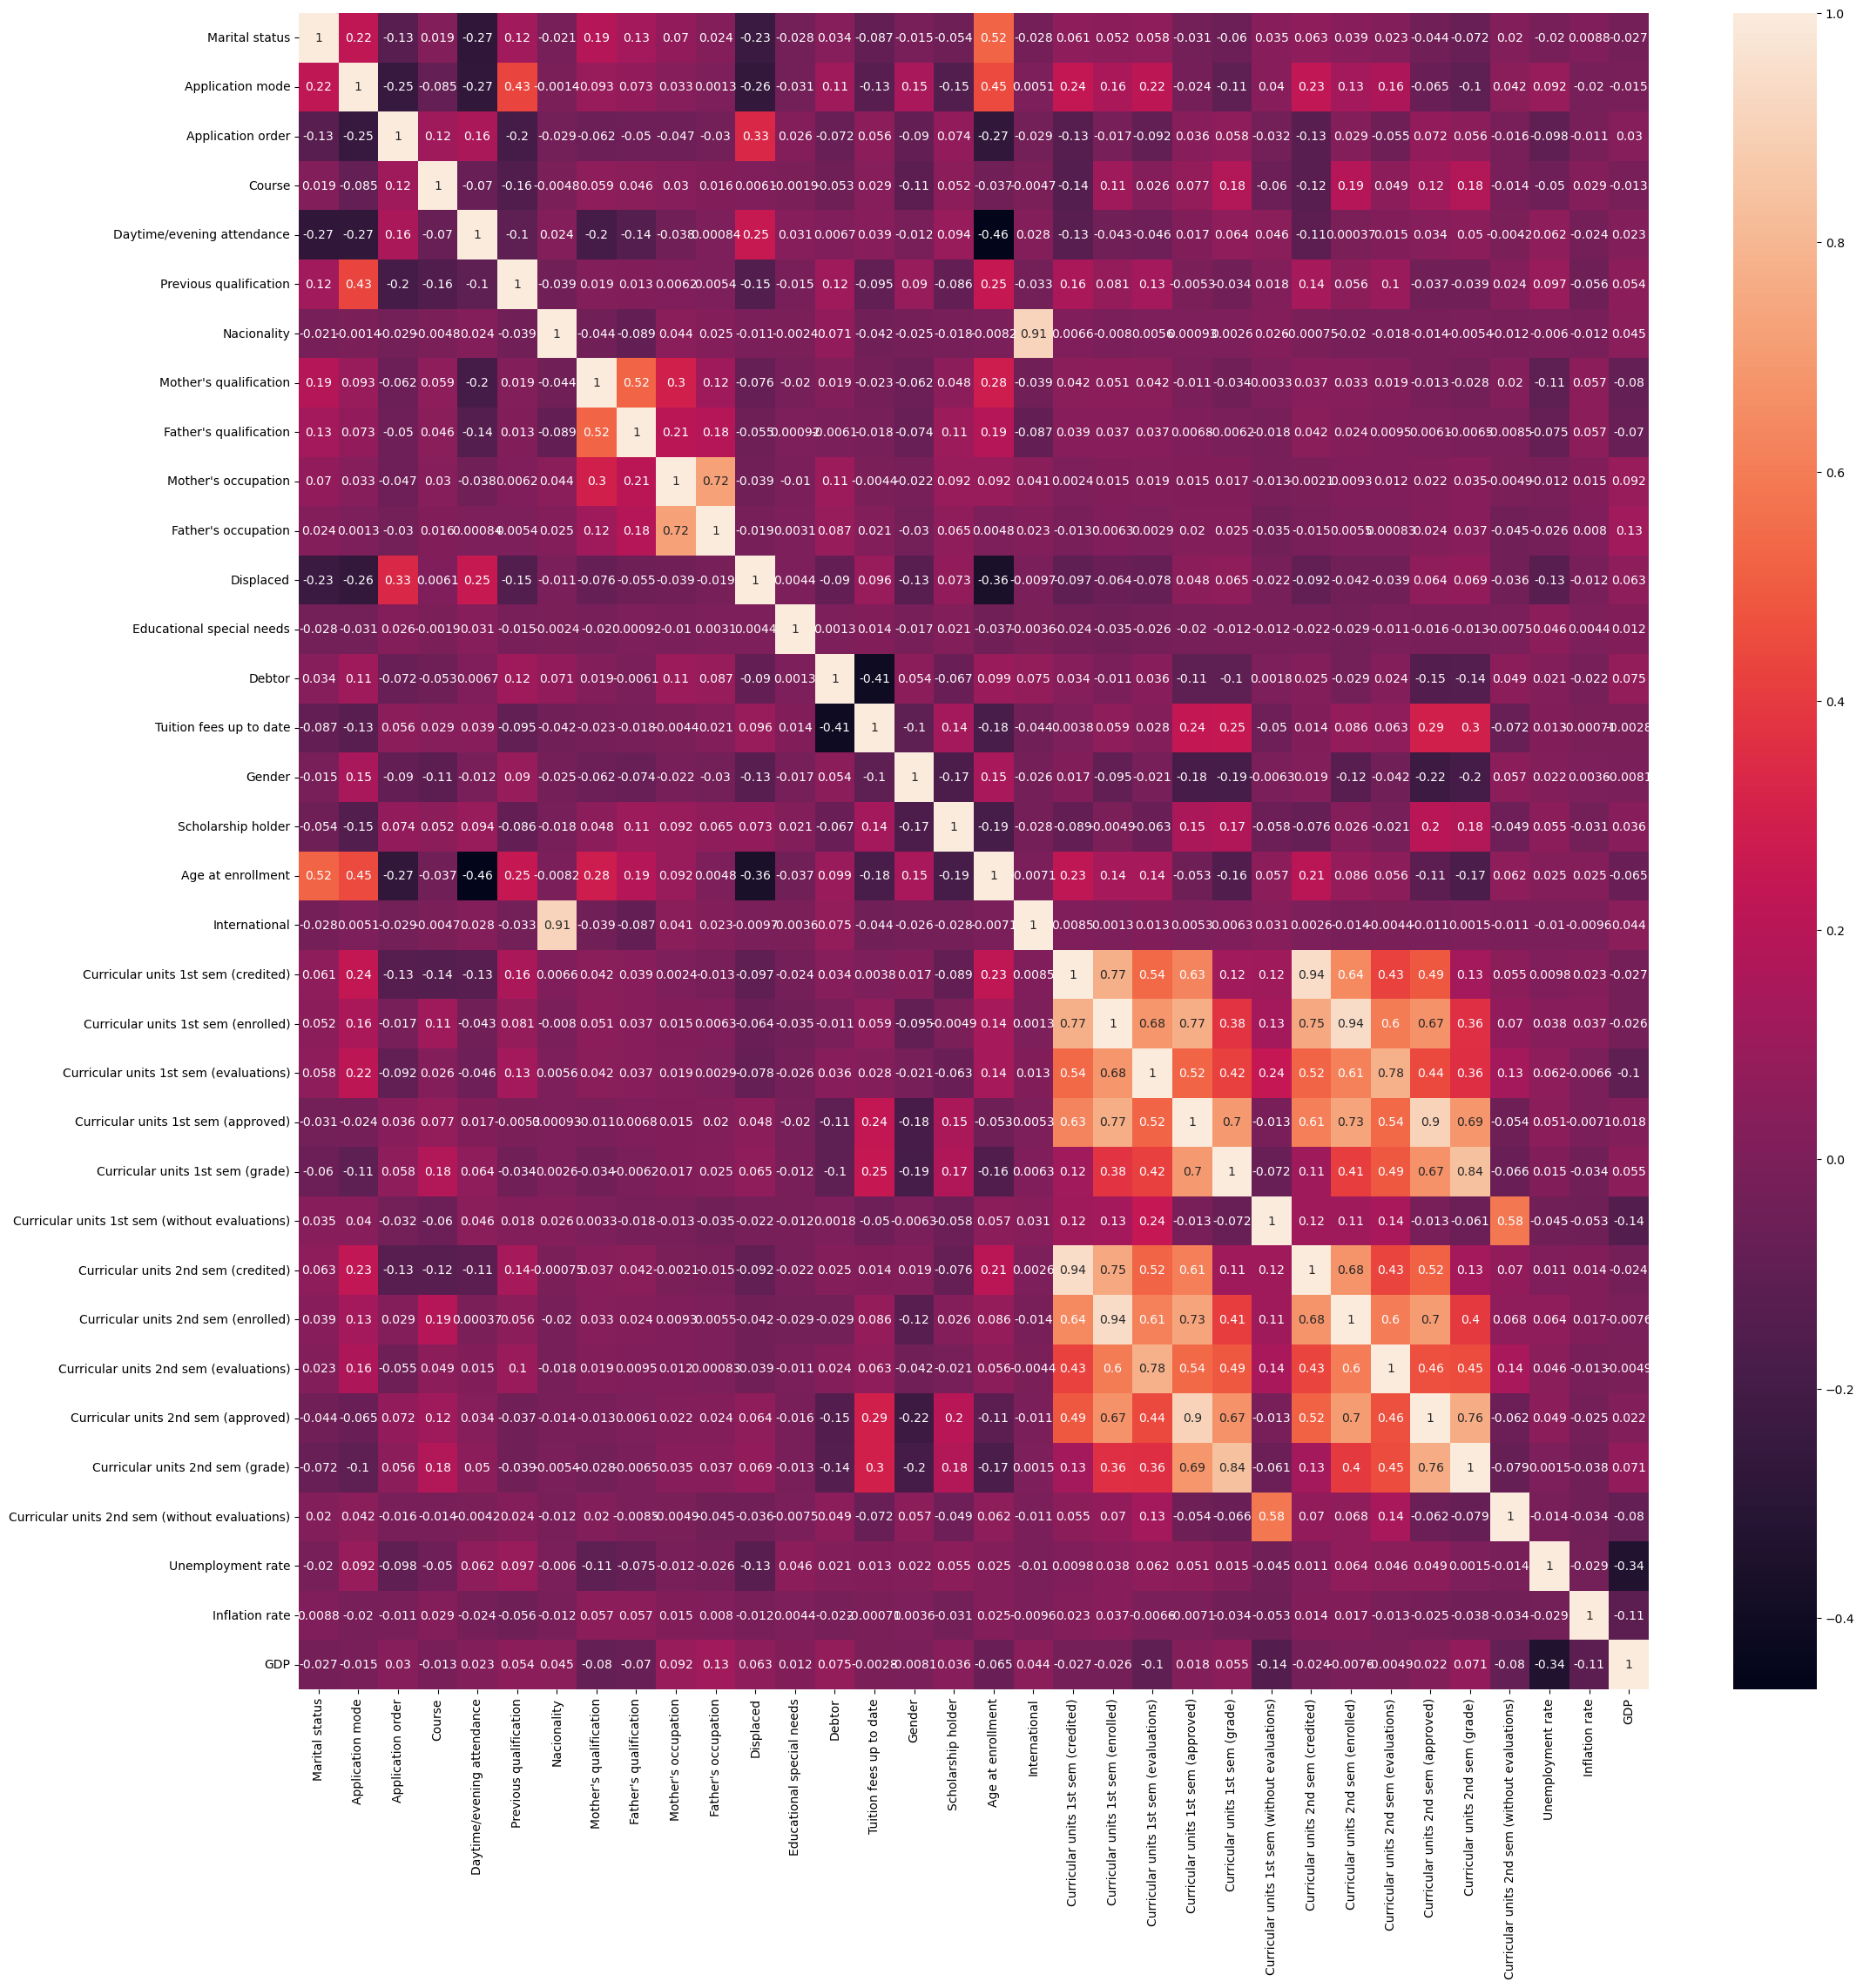

In [24]:
plt.figure(figsize=(25, 25))
numerical_data = dataAwal.select_dtypes(include=[np.number])
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

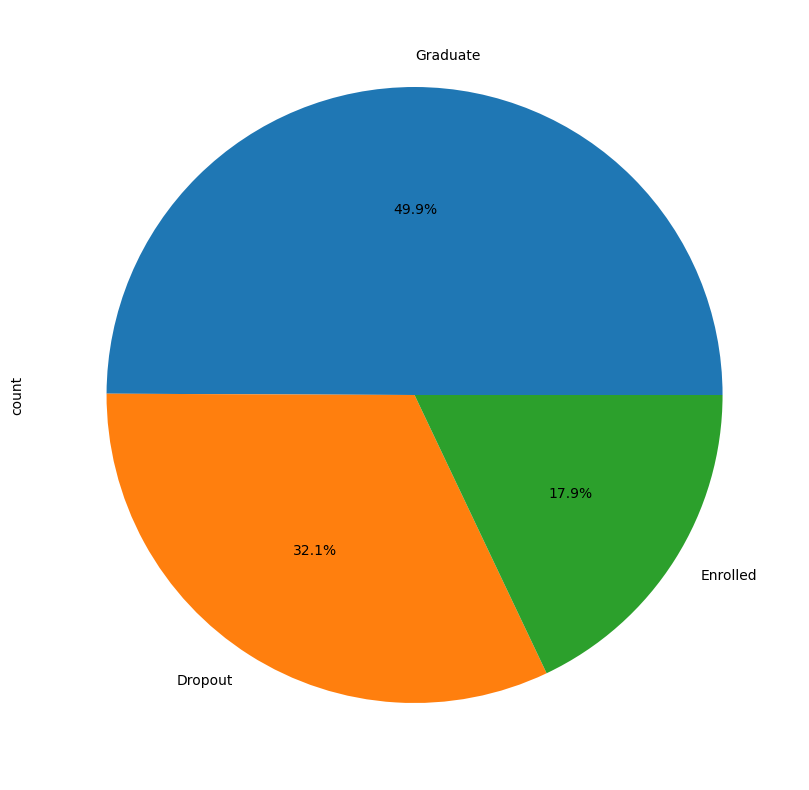

In [25]:
# visualisasi data smk askha dgn menggunakan pie chart
plt.figure(figsize=(10, 10))
dataAwal["Target"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()


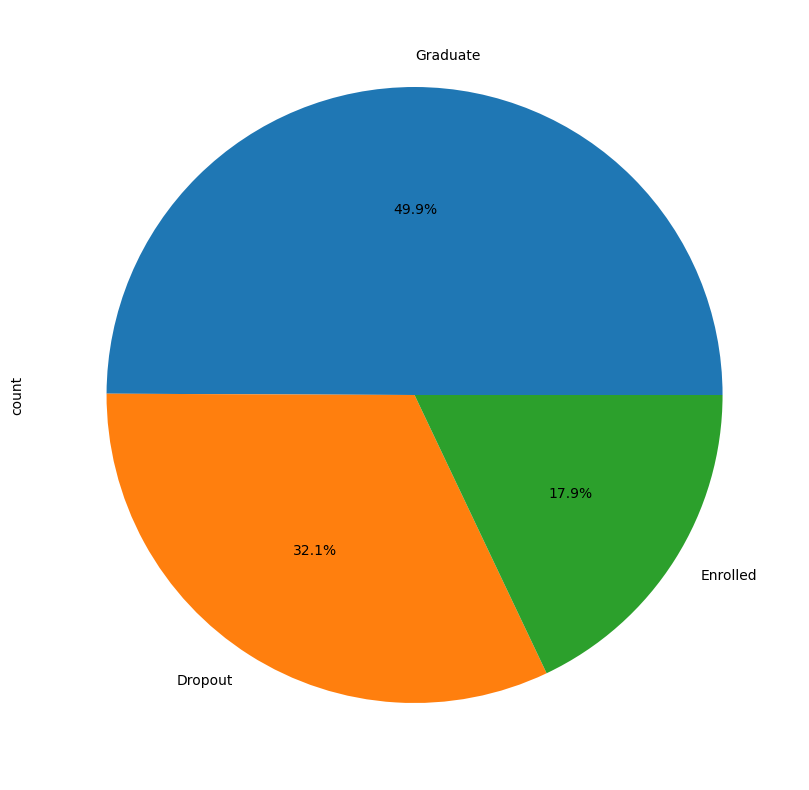

In [26]:
# visuaslisasi data jk dan keluar karena dgn menggunakan pie chart
plt.figure(figsize=(10, 10))
dataAwal["Target"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()
